# Step1: Data Preprocessing

In [1]:
import pandas as pd

# Load the dataset
covid_data = pd.read_csv('./covid-19 dataset/covid_19_data.csv')
# confirmed_us = pd.read_csv('./covid-19 dataset/time_series_covid_19_confirmed_US.csv')
# confirmed_global = pd.read_csv('./covid-19 dataset/time_series_covid_19_confirmed.csv')
# death_us = pd.read_csv('./covid-19 dataset/time_series_covid_19_deaths_US.csv')
# deaths_global = pd.read_csv('./covid-19 dataset/time_series_covid_19_deaths.csv')
# recovered_global = pd.read_csv('./covid-19 dataset/time_series_covid_19_recovered.csv')

print(covid_data.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


In [2]:
# Convert 'ObservationDate' column to datetime type
covid_data['Date'] = pd.to_datetime(covid_data['ObservationDate'], format='%m/%d/%Y')

print(covid_data.head())

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered       Date  
0        1.0     0.0        0.0 2020-01-22  
1       14.0     0.0        0.0 2020-01-22  
2        6.0     0.0        0.0 2020-01-22  
3        1.0     0.0        0.0 2020-01-22  
4        0.0     0.0        0.0 2020-01-22  


In [3]:
# Replace 'Mainland China' with 'China'
covid_data['Country/Region'] = covid_data['Country/Region'].replace('Mainland China', 'China')

print(covid_data.head())

   SNo ObservationDate Province/State Country/Region      Last Update  \
0    1      01/22/2020          Anhui          China  1/22/2020 17:00   
1    2      01/22/2020        Beijing          China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing          China  1/22/2020 17:00   
3    4      01/22/2020         Fujian          China  1/22/2020 17:00   
4    5      01/22/2020          Gansu          China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered       Date  
0        1.0     0.0        0.0 2020-01-22  
1       14.0     0.0        0.0 2020-01-22  
2        6.0     0.0        0.0 2020-01-22  
3        1.0     0.0        0.0 2020-01-22  
4        0.0     0.0        0.0 2020-01-22  


In [4]:
# Merge 'Hong Kong' and 'Macau' into 'Mainland China'
covid_data['Country/Region'] = covid_data['Country/Region'].replace({'Hong Kong': 'China', 'Macau': 'China'})

print(covid_data[['Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']].head())

  Country/Region       Date  Confirmed  Deaths  Recovered
0          China 2020-01-22        1.0     0.0        0.0
1          China 2020-01-22       14.0     0.0        0.0
2          China 2020-01-22        6.0     0.0        0.0
3          China 2020-01-22        1.0     0.0        0.0
4          China 2020-01-22        0.0     0.0        0.0


In [5]:
# Group by 'Country/Region' and 'Date', summing the 'Confirmed', 'Deaths', and 'Recovered' columns
covid_data = covid_data.groupby(['Country/Region', 'Date'], as_index=False)[
    ['Confirmed', 'Deaths', 'Recovered']
].sum()

print(covid_data.head())

    Country/Region       Date  Confirmed  Deaths  Recovered
0       Azerbaijan 2020-02-28        1.0     0.0        0.0
1  ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2      Afghanistan 2020-02-24        1.0     0.0        0.0
3      Afghanistan 2020-02-25        1.0     0.0        0.0
4      Afghanistan 2020-02-26        1.0     0.0        0.0


In [6]:
# Create weekly dataset

# Add 'Year' and 'Week' columns
covid_data['Year'] = covid_data['Date'].dt.isocalendar().year
covid_data['Week'] = covid_data['Date'].dt.isocalendar().week

# Calculate weekly data
weekly_data = covid_data.groupby(['Country/Region', 'Year', 'Week'], as_index=False).last()

# Sort
weekly_data = weekly_data.sort_values(by=['Country/Region', 'Year', 'Week'])

# Drop the 'Date' column, as it is redundant now
weekly_data = weekly_data.drop(columns=['Date'])

# Calculate Weekly New Cases
weekly_data['Weekly_New_Cases'] = weekly_data.groupby('Country/Region')['Confirmed'].diff().fillna(weekly_data['Confirmed'])

# Calculate Weekly New Deaths
weekly_data['Weekly_New_Deaths'] = weekly_data.groupby('Country/Region')['Deaths'].diff().fillna(weekly_data['Deaths'])

# Calculate Weekly New Recovered
weekly_data['Weekly_New_Recovered'] = weekly_data.groupby('Country/Region')['Recovered'].diff().fillna(weekly_data['Recovered'])

# View the result
print(weekly_data.head())

    Country/Region  Year  Week  Confirmed  Deaths  Recovered  \
0       Azerbaijan  2020     9        1.0     0.0        0.0   
1  ('St. Martin',)  2020    11        2.0     0.0        0.0   
2      Afghanistan  2020     9        1.0     0.0        0.0   
3      Afghanistan  2020    10        5.0     0.0        0.0   
4      Afghanistan  2020    11       16.0     0.0        0.0   

   Weekly_New_Cases  Weekly_New_Deaths  Weekly_New_Recovered  
0               1.0                0.0                   0.0  
1               2.0                0.0                   0.0  
2               1.0                0.0                   0.0  
3               4.0                0.0                   0.0  
4              11.0                0.0                   0.0  


In [7]:
# Clean the weekly_data dataset by deleting countries with less 60 weekly data entries

# Count the number of weekly data entries for each country/region
country_counts = weekly_data.groupby('Country/Region').size()

# Keep countries with 60 or more data entries
countries_keep = country_counts[country_counts >= 60].index

# Update weekly_data dataset
weekly_data = weekly_data[weekly_data['Country/Region'].isin(countries_keep)].copy() 

print(countries_keep)

print(len(countries_keep))

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Ukraine', 'United Arab Emirates', 'Uruguay', 'Uzbekistan', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=186)
186


# Step 2: Calculate Weekly Case Fatality Rate

In [8]:
# Calculate Weekly Case Fatality Rate
weekly_data['Weekly_CFR'] = (weekly_data['Deaths'] / weekly_data['Confirmed']) * 100

# Replace inf and NaN with 0
weekly_data['Weekly_CFR'] = weekly_data['Weekly_CFR'].replace([float('inf'), float('-inf')], 0) # inf -> 0
weekly_data['Weekly_CFR'] = weekly_data['Weekly_CFR'].fillna(0) # NaN -> 0

print(weekly_data.head(10))

   Country/Region  Year  Week  Confirmed  Deaths  Recovered  Weekly_New_Cases  \
2     Afghanistan  2020     9        1.0     0.0        0.0               1.0   
3     Afghanistan  2020    10        5.0     0.0        0.0               4.0   
4     Afghanistan  2020    11       16.0     0.0        0.0              11.0   
5     Afghanistan  2020    12       34.0     1.0        1.0              18.0   
6     Afghanistan  2020    13      118.0     4.0        2.0              84.0   
7     Afghanistan  2020    14      338.0    12.0       15.0             220.0   
8     Afghanistan  2020    15      608.0    19.0       32.0             270.0   
9     Afghanistan  2020    16      997.0    33.0      131.0             389.0   
10    Afghanistan  2020    17     1532.0    52.0      207.0             535.0   
11    Afghanistan  2020    18     2705.0    85.0      345.0            1173.0   

    Weekly_New_Deaths  Weekly_New_Recovered  Weekly_CFR  
2                 0.0                   0.0    0.0

# Step 3: Calculate Weekly Active Rate

In [9]:
# Calculate Weekly Active Rate
weekly_data['Weekly_Active_Rate'] = (weekly_data['Confirmed'] - weekly_data['Deaths'] - weekly_data['Recovered']) / weekly_data['Confirmed']

# Replace inf and NaN with 0
weekly_data['Weekly_Active_Rate'] = weekly_data['Weekly_Active_Rate'].replace([float('inf'), float('-inf')], 0)  # inf -> 0
weekly_data['Weekly_Active_Rate'] = weekly_data['Weekly_Active_Rate'].fillna(0) # NaN -> 0

weekly_data['Weekly_Active_Rate'] = weekly_data['Weekly_Active_Rate'] * 100

print(weekly_data.head())

  Country/Region  Year  Week  Confirmed  Deaths  Recovered  Weekly_New_Cases  \
2    Afghanistan  2020     9        1.0     0.0        0.0               1.0   
3    Afghanistan  2020    10        5.0     0.0        0.0               4.0   
4    Afghanistan  2020    11       16.0     0.0        0.0              11.0   
5    Afghanistan  2020    12       34.0     1.0        1.0              18.0   
6    Afghanistan  2020    13      118.0     4.0        2.0              84.0   

   Weekly_New_Deaths  Weekly_New_Recovered  Weekly_CFR  Weekly_Active_Rate  
2                0.0                   0.0    0.000000          100.000000  
3                0.0                   0.0    0.000000          100.000000  
4                0.0                   0.0    0.000000          100.000000  
5                1.0                   1.0    2.941176           94.117647  
6                3.0                   1.0    3.389831           94.915254  


# Step 4: Calculate Peak Intensity (Max weekly new cases) and Peak Week

In [10]:
# Calculate Peak Intensity (Max weekly new cases)
peak_intensity = weekly_data.groupby('Country/Region')['Weekly_New_Cases'].max()

# Calculate Peak Week Identifier
idx_max = weekly_data.groupby('Country/Region')['Weekly_New_Cases'].idxmax()
peak_data = weekly_data.loc[idx_max, ['Country/Region', 'Year', 'Week']].set_index('Country/Region')
peak_data['Peak_Identifier'] = peak_data['Year'].astype(str) + '-' + peak_data['Week'].astype(str).str.zfill(2)

# Merge Peak Intensity and Peak Week into the original data
weekly_data['Peak_Intensity'] = weekly_data['Country/Region'].map(peak_intensity)
weekly_data['Peak_Identifier'] = weekly_data['Country/Region'].map(peak_data['Peak_Identifier'])

print(weekly_data.head())

  Country/Region  Year  Week  Confirmed  Deaths  Recovered  Weekly_New_Cases  \
2    Afghanistan  2020     9        1.0     0.0        0.0               1.0   
3    Afghanistan  2020    10        5.0     0.0        0.0               4.0   
4    Afghanistan  2020    11       16.0     0.0        0.0              11.0   
5    Afghanistan  2020    12       34.0     1.0        1.0              18.0   
6    Afghanistan  2020    13      118.0     4.0        2.0              84.0   

   Weekly_New_Deaths  Weekly_New_Recovered  Weekly_CFR  Weekly_Active_Rate  \
2                0.0                   0.0    0.000000          100.000000   
3                0.0                   0.0    0.000000          100.000000   
4                0.0                   0.0    0.000000          100.000000   
5                1.0                   1.0    2.941176           94.117647   
6                3.0                   1.0    3.389831           94.915254   

   Peak_Intensity Peak_Identifier  
2          513

# Step 5: Calculate Weekly Growth Rate, R7 and R14

In [11]:
# Caculate Weekly Growth Rate
weekly_data['Weekly_Growth_Rate_R1'] = weekly_data.groupby('Country/Region')['Weekly_New_Cases'].pct_change() * 100

# Calculate R7 (growth rate over the past 7 weeks)
weekly_data['Weekly_Growth_Rate_R7'] = weekly_data.groupby('Country/Region')['Weekly_New_Cases'].pct_change(periods=7) * 100

# Calculate R14 (growth rate over the past 14 weeks)
weekly_data['Weekly_Growth_Rate_R14'] = weekly_data.groupby('Country/Region')['Weekly_New_Cases'].pct_change(periods=14) * 100

# Replace NaN and inf with 0
weekly_data['Weekly_Growth_Rate_R1'] = weekly_data['Weekly_Growth_Rate_R1'].fillna(0)
weekly_data['Weekly_Growth_Rate_R1'] = weekly_data['Weekly_Growth_Rate_R1'].replace([float('inf'), float('-inf')], 0)

weekly_data['Weekly_Growth_Rate_R7'] = weekly_data['Weekly_Growth_Rate_R7'].fillna(0)
weekly_data['Weekly_Growth_Rate_R7'] = weekly_data['Weekly_Growth_Rate_R7'].replace([float('inf'), float('-inf')], 0)

weekly_data['Weekly_Growth_Rate_R14'] = weekly_data['Weekly_Growth_Rate_R14'].fillna(0)
weekly_data['Weekly_Growth_Rate_R14'] = weekly_data['Weekly_Growth_Rate_R14'].replace([float('inf'), float('-inf')], 0)

print(weekly_data.head())

  Country/Region  Year  Week  Confirmed  Deaths  Recovered  Weekly_New_Cases  \
2    Afghanistan  2020     9        1.0     0.0        0.0               1.0   
3    Afghanistan  2020    10        5.0     0.0        0.0               4.0   
4    Afghanistan  2020    11       16.0     0.0        0.0              11.0   
5    Afghanistan  2020    12       34.0     1.0        1.0              18.0   
6    Afghanistan  2020    13      118.0     4.0        2.0              84.0   

   Weekly_New_Deaths  Weekly_New_Recovered  Weekly_CFR  Weekly_Active_Rate  \
2                0.0                   0.0    0.000000          100.000000   
3                0.0                   0.0    0.000000          100.000000   
4                0.0                   0.0    0.000000          100.000000   
5                1.0                   1.0    2.941176           94.117647   
6                3.0                   1.0    3.389831           94.915254   

   Peak_Intensity Peak_Identifier  Weekly_Growth_R

# Step 6: Construct Cross-Sectional Features (with Z-score Normalization)

In [12]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create cross_sectional_features DataFrame
cross_sectional_features = pd.DataFrame()

# Total Confirmed
cross_sectional_features['Total_Confirmed'] = weekly_data.groupby('Country/Region')['Confirmed'].max()

# Total Deaths
cross_sectional_features['Total_Deaths'] = weekly_data.groupby('Country/Region')['Deaths'].max()

# Total Recovered
cross_sectional_features['Total_Recovered'] = weekly_data.groupby('Country/Region')['Recovered'].max()

# Average Weekly CFR
cross_sectional_features['Avg_Weekly_CFR'] = weekly_data.groupby('Country/Region')['Weekly_CFR'].mean()

# Max Weekly CFR
# cross_sectional_features['Final_CFR'] = cross_sectional_features['Total_Deaths'] / cross_sectional_features['Total_Confirmed']

# Average Weekly Active Rate
cross_sectional_features['Avg_Weekly_Active_Rate'] = weekly_data.groupby('Country/Region')['Weekly_Active_Rate'].mean()

# Average R1, R7 and R14
cross_sectional_features['Avg_Growth_Rate_R1'] = weekly_data.groupby('Country/Region')['Weekly_Growth_Rate_R1'].mean()
cross_sectional_features['Avg_Growth_Rate_R7'] = weekly_data.groupby('Country/Region')['Weekly_Growth_Rate_R7'].mean()
cross_sectional_features['Avg_Growth_Rate_R14'] = weekly_data.groupby('Country/Region')['Weekly_Growth_Rate_R14'].mean()

# Peak Intensity
cross_sectional_features['Peak_Intensity'] = weekly_data.groupby('Country/Region')['Peak_Intensity'].max()

# Peak Week Identifier
cross_sectional_features['Peak_Identifier'] = weekly_data.groupby('Country/Region')['Peak_Identifier'].max()

cols_to_scale = cross_sectional_features.columns.difference(['Peak_Identifier'])

# Z-score Normalization
scaler = StandardScaler()
cross_sectional_features[cols_to_scale] = scaler.fit_transform(cross_sectional_features[cols_to_scale])

print(cross_sectional_features.head())

                Total_Confirmed  Total_Deaths  Total_Recovered  \
Country/Region                                                   
Afghanistan           -0.243288     -0.248795        -0.241857   
Albania               -0.225376     -0.255751        -0.210382   
Algeria               -0.226482     -0.240123        -0.227795   
Andorra               -0.259538     -0.291642        -0.261050   
Angola                -0.253637     -0.281904        -0.254824   

                Avg_Weekly_CFR  Avg_Weekly_Active_Rate  Avg_Growth_Rate_R1  \
Country/Region                                                               
Afghanistan           0.321096                0.163751           -0.281939   
Albania              -0.022659                0.370558           -0.764595   
Algeria               0.678812                0.187967           -0.134275   
Andorra               0.076043               -0.915370            0.361149   
Angola                0.514460                0.692540           -0.1

# K-means

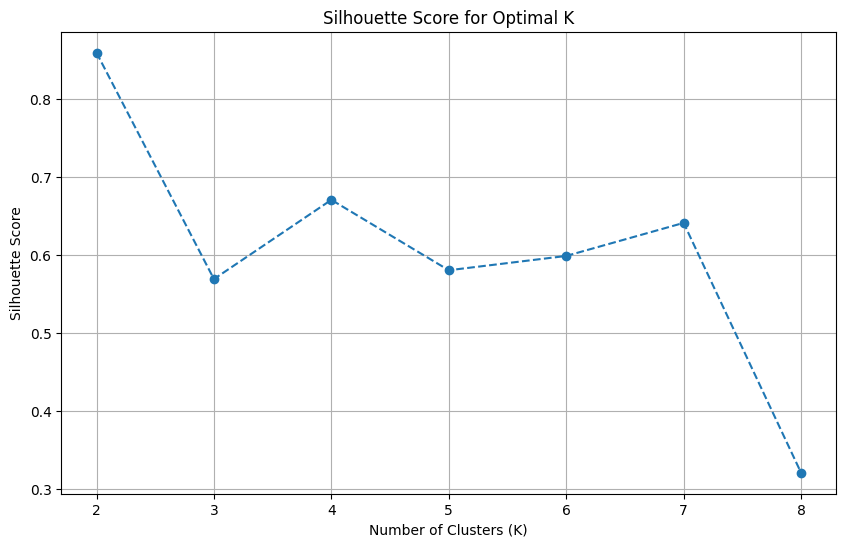


--- Silhouette Scores for Each K ---
K = 2: Silhouette Score = 0.8595
K = 3: Silhouette Score = 0.5693
K = 4: Silhouette Score = 0.6709
K = 5: Silhouette Score = 0.5806
K = 6: Silhouette Score = 0.5990
K = 7: Silhouette Score = 0.6413
K = 8: Silhouette Score = 0.3211


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Prepare the data for clustering (features scaled using Z-score normalization)
cols_to_scale = cross_sectional_features.columns.difference(['Peak_Identifier'])
X = cross_sectional_features[cols_to_scale].values

silhouette_scores = {}

# Define the range of clusters to evaluate (from K=2 to K=8)
k_range = range(2, 9)

for k in k_range:
    # 1. Apply K-Means clustering algorithm
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    # 2. Compute silhouette score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores[k] = score

# Plot the silhouette scores for each K value
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores.values(), marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Print silhouette scores for each K 
print("\n--- Silhouette Scores for Each K ---")
for k, score in silhouette_scores.items():
    print(f"K = {k}: Silhouette Score = {score:.4f}")

# Step 7: Normalized Time Series Matrix (Weekly New Cases)

In [14]:
# Normalized Time Series Matrix (Weekly New Cases)

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Set a fixed target length (number of weeks)
TARGET_LENGTH = 60

# Build a cropped time series matrix
ts_matrix_cropped = weekly_data.groupby('Country/Region')['Weekly_New_Cases'].apply(
    lambda x: x.values[:TARGET_LENGTH]
).apply(pd.Series)

# Normalize, and create the matrix  
scaler = MinMaxScaler()

ts_matrix_normalized = ts_matrix_cropped.apply(
    lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten(), axis=1, result_type='expand'
)

# Set column name
ts_matrix_normalized.columns.name = 'Week Index'

print(ts_matrix_normalized.head())

Week Index            0         1         2         3         4         5   \
Country/Region                                                               
Afghanistan     0.000000  0.000584  0.001947  0.003310  0.016160  0.042640   
Albania         0.000000  0.000650  0.010524  0.013902  0.005587  0.009614   
Algeria         0.000000  0.002310  0.003805  0.020658  0.041995  0.109812   
Andorra         0.001271  0.000000  0.142313  0.280813  0.212198  0.174079   
Angola          0.000000  0.001707  0.002846  0.001707  0.001707  0.000000   

Week Index            6         7         8         9   ...        50  \
Country/Region                                          ...             
Afghanistan     0.052375  0.075545  0.103972  0.228193  ...  0.030374   
Albania         0.015850  0.003508  0.004028  0.004677  ...  0.893725   
Algeria         0.080593  0.097037  0.102202  0.148274  ...  0.220440   
Andorra         0.095299  0.031766  0.012706  0.008895  ...  0.249047   
Angola         

# Step 8: Plot Normalized Weekly New Cases Curves

Selected countries: Brazil, Denmark, France, Germany, India, Italy, Japan, China, Spain, US


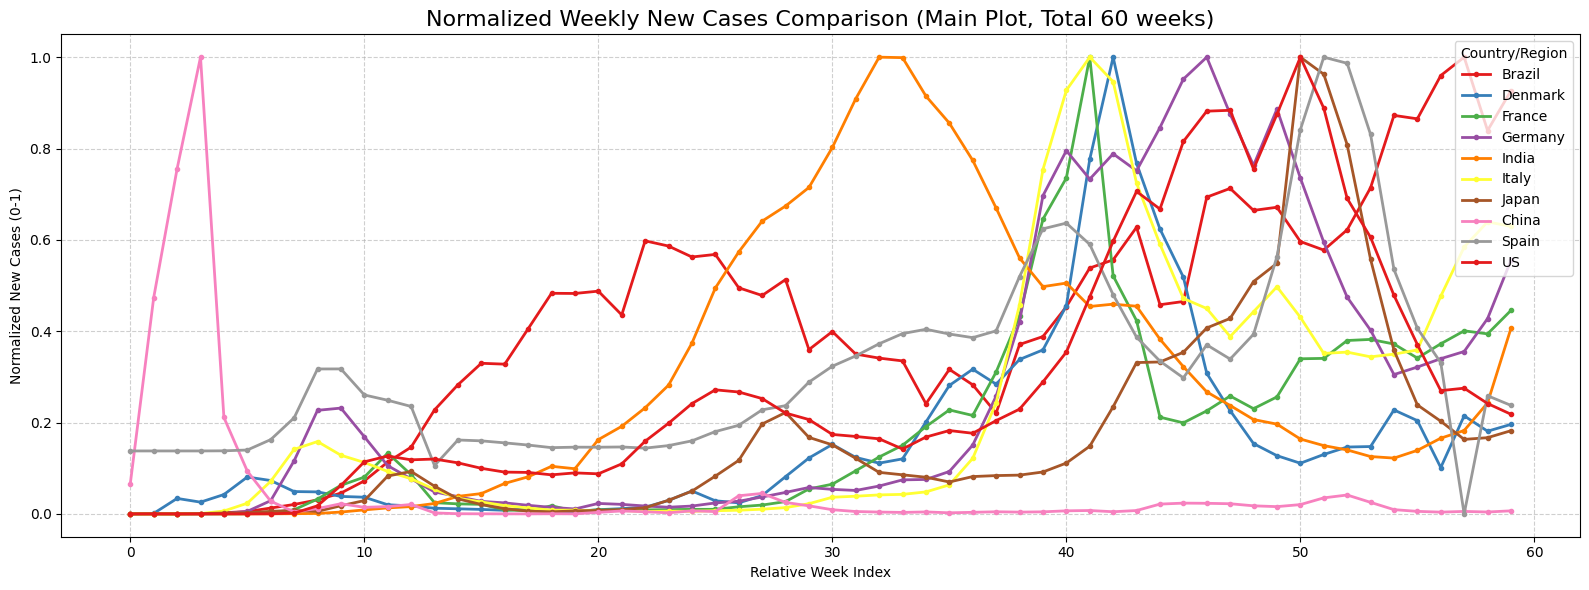

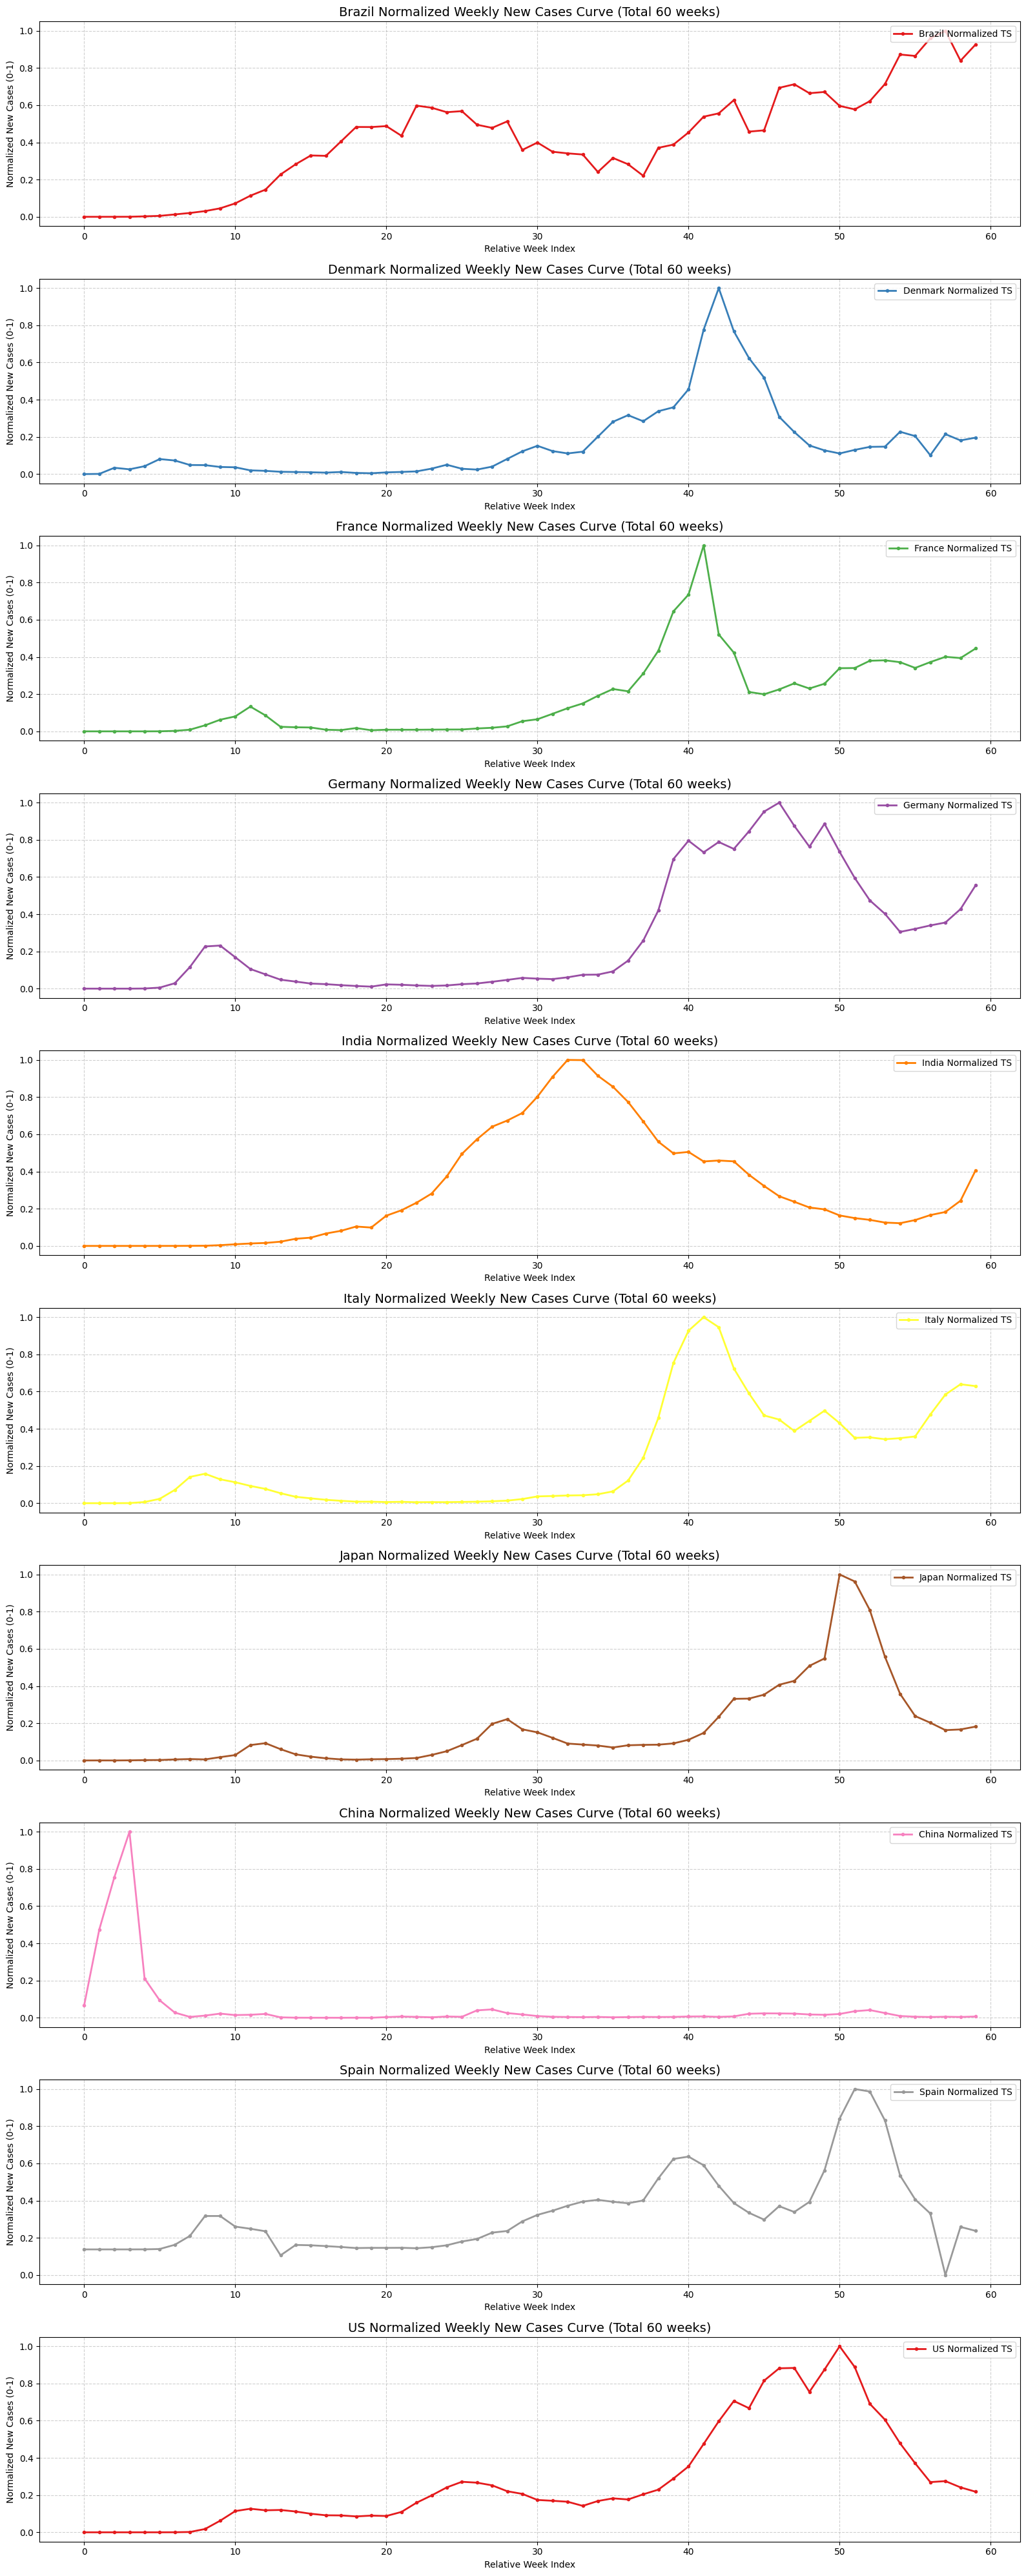

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Selected countries
countries_to_plot = ['Brazil', 'Denmark', 'France', 'Germany', 'India', 'Italy', 'Japan', 'China', 'Spain', 'US']

num_plots = len(countries_to_plot)
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']

print(f"Selected countries: {', '.join(countries_to_plot)}")

# Plot the main chart
plt.figure(figsize=(16, 6))

for i, country in enumerate(countries_to_plot):
    ts_data = ts_matrix_normalized.loc[country].values.flatten()
    time_index = np.arange(len(ts_data))
    
    plt.plot(time_index, ts_data, 
             marker='o', markersize=3, linestyle='-', linewidth=2, 
             color=colors[i % len(colors)], 
             label=country)

plt.title(f'Normalized Weekly New Cases Comparison (Main Plot, Total {len(ts_data)} weeks)', fontsize=16)
plt.xlabel('Relative Week Index')
plt.ylabel('Normalized New Cases (0-1)')
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country/Region', loc='upper right')
plt.tight_layout()
plt.show()

# Plot subplots for each country
fig, axes = plt.subplots(num_plots, 1, figsize=(16, 4 * num_plots))

# Ensure axes is an array
if num_plots == 1:
    axes = np.array([axes])

# Loop to plot each country's curve
for i, country in enumerate(countries_to_plot):
    ax = axes[i]
    
    ts_data = ts_matrix_normalized.loc[country].values.flatten()
    time_index = np.arange(len(ts_data))

    # Plot the curve
    ax.plot(time_index, ts_data, 
             marker='o', markersize=3, linestyle='-', linewidth=2, 
             color=colors[i % len(colors)], 
             label=f'{country} Normalized TS')
    
    ax.set_title(f'{country} Normalized Weekly New Cases Curve (Total {len(ts_data)} weeks)', fontsize=14)
    ax.set_xlabel('Relative Week Index')
    ax.set_ylabel('Normalized New Cases (0-1)')
    ax.set_ylim(-0.05, 1.05)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Step 9: Plot Cosine Simliarity, Cosine Distance & DTW Matrix Heatmaps

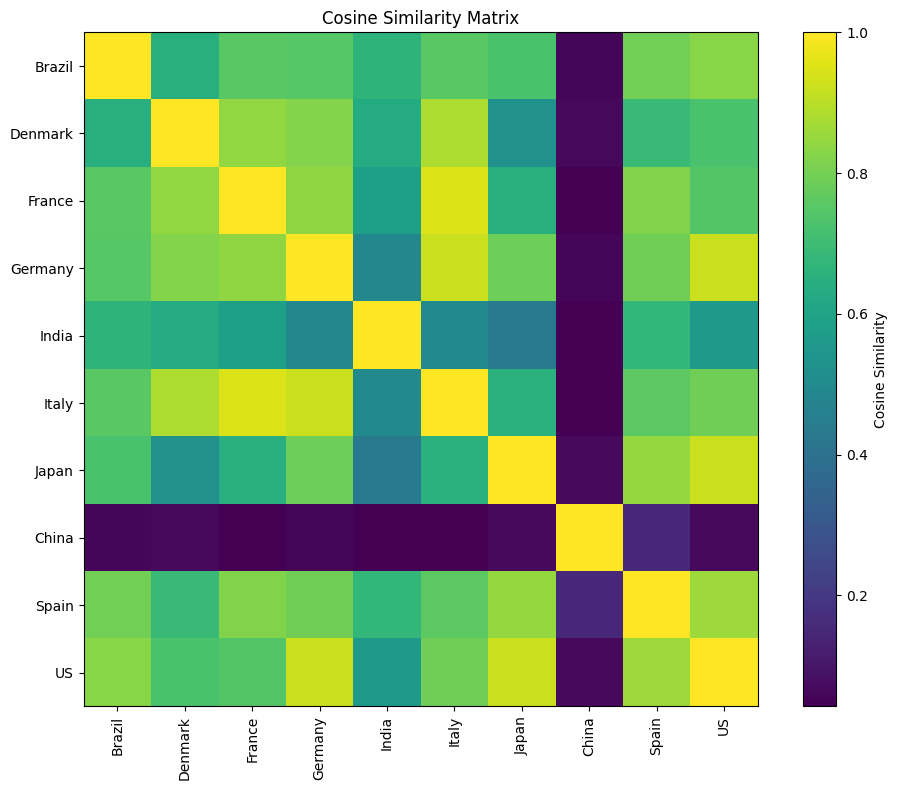

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the selected countries
ts_matrix_filtered = ts_matrix_normalized.loc[countries_to_plot]

# Calculate the cosine similarity matrix for the selected countries 
cosine_sim_matrix = cosine_similarity(ts_matrix_filtered)

# Visualize
plt.figure(figsize=(10, 8))
plt.imshow(cosine_sim_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Cosine Similarity Matrix')
plt.xticks(np.arange(len(countries_to_plot)), countries_to_plot, rotation=90)
plt.yticks(np.arange(len(countries_to_plot)), countries_to_plot)
plt.tight_layout()
plt.show()

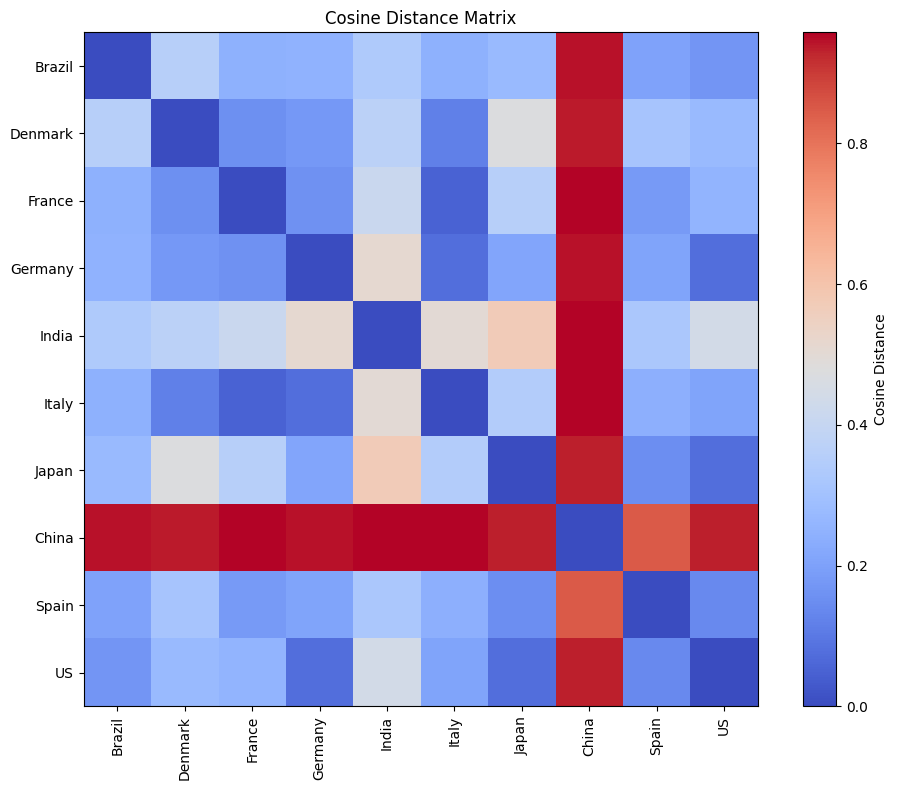

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the selected countries
ts_matrix_filtered = ts_matrix_normalized.loc[countries_to_plot]

# Compute the Cosine Similarity matrix for the selected countries
cosine_sim_matrix = cosine_similarity(ts_matrix_filtered)

# Convert Cosine Similarity to Cosine Distance
cosine_dist_matrix = 1 - cosine_sim_matrix

# Visualize the Cosine Distance Matrix (heatmap)
plt.figure(figsize=(10, 8))
plt.imshow(cosine_dist_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Cosine Distance')
plt.title('Cosine Distance Matrix')
plt.xticks(np.arange(len(countries_to_plot)), countries_to_plot, rotation=90)
plt.yticks(np.arange(len(countries_to_plot)), countries_to_plot)
plt.tight_layout()
plt.show()

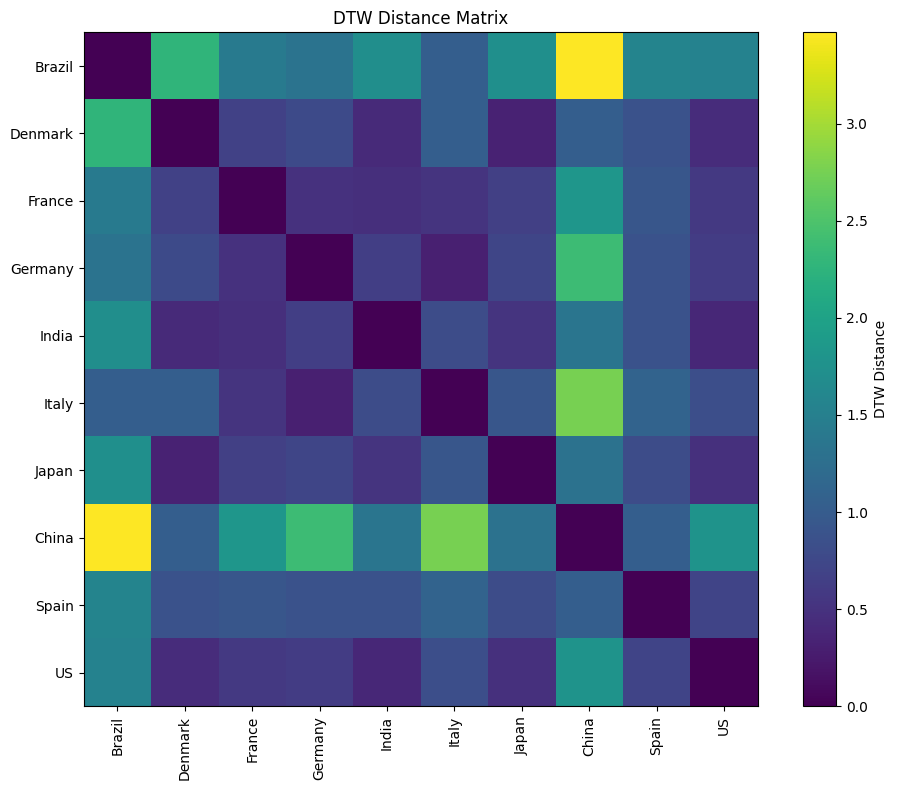

In [18]:
from tslearn.metrics import cdist_dtw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to only include the selected countries
ts_matrix_filtered = ts_matrix_normalized.loc[countries_to_plot]

# Reshape data for DTW (it requires 3D array: [num_series, time_steps, 1])
ts_matrix_filtered_reshaped = ts_matrix_filtered.values.reshape(ts_matrix_filtered.shape[0], ts_matrix_filtered.shape[1], 1)

# Compute the DTW distance matrix
dtw_dist_matrix = cdist_dtw(ts_matrix_filtered_reshaped, ts_matrix_filtered_reshaped)

# Visualize the DTW Distance Matrix (heatmap)
plt.figure(figsize=(10, 8))
plt.imshow(dtw_dist_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='DTW Distance')
plt.title('DTW Distance Matrix')
plt.xticks(np.arange(len(countries_to_plot)), countries_to_plot, rotation=90)
plt.yticks(np.arange(len(countries_to_plot)), countries_to_plot)
plt.tight_layout()
plt.show()